## Define functions

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sb
from network_builder import *
from BNReasoner import *

c:\Users\Velotri\source\repos\vu_projects\KR21_project2\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def run_a_posteriori(bn, n_q):
    bn = BayesNet(structure=bn.structure.copy())
    variables = bn.get_all_variables()
    q = np.random.choice(variables, size=n_q)
    e = np.random.choice([v for v in variables if v not in q], size=1)
    e = {e[0]: True}
    r = BNReasoner(bn)
    start = time.time()
    r.maximum_a_posteriori(q, e)
    return time.time() - start

def run_mpe(bn, n_e):
    bn = BayesNet(structure=bn.structure.copy())
    variables = bn.get_all_variables()
    _e = np.random.choice(variables, size=n_e)
    e = {}
    for v in _e:
        e[v] = True
    r = BNReasoner(bn)
    start = time.time()
    r.most_probable_explanation(e)
    return time.time() - start

## Run experiments

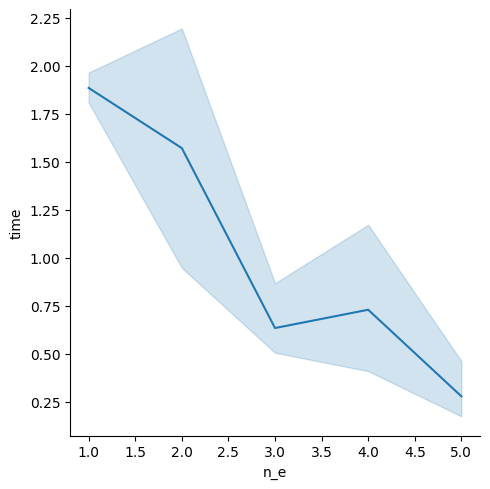

In [11]:
# mpe
samples = 4
bn = build_network(depth=3, width=2)
max_n_e = len(bn.get_all_variables())

df = pd.DataFrame()
for n_e in range(1, max_n_e):
    times = []
    for _ in range(samples):
        bn = build_network(depth=3, width=3)
        times.append(run_mpe(bn, n_e))
    df = pd.concat([df, pd.DataFrame({"n_e": [n_e] * samples, "time": times})])
    print(f"n_e: {n_e}, avg time: {np.mean(times)}")

sb.relplot(x="n_e", y="time", data=df, kind="line");

In [ ]:
# a_posteriori
samples = 2
bn = build_network(depth=3, width=2)
max_n_q = len(bn.get_all_variables())

df = pd.DataFrame()
for n_q in range(1, max_n_q):
    times = []
    for _ in range(samples):
        bn = build_network(depth=3, width=2)
        times.append(run_a_posteriori(bn, n_q))
    df = pd.concat([df, pd.DataFrame({"n_q": [n_q] * samples, "time": times})])
    print(f"n_q: {n_q}, avg time: {np.mean(times)}")

sb.relplot(x="n_q", y="time", data=df, kind="line");